<a href="https://colab.research.google.com/github/vaishnavibelgamwar/Manmage/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SENTIMENT ANALYSIS USING LOGISTIC REGRESSION



---






Importing Libraries

In [ ]:
import pandas as pd
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter
import nltk
import re

Loading Dataset

In [ ]:
df = pd.read_excel('/content/sentiment analysis.xlsx')

In [ ]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km≤),Density (P/Km≤)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the large English NLP model
nlp = spacy.load('en_core_web_lg')

# The text processing function
def process_text(text):
    doc = nlp(text.lower())  # Process each text entry
    # Filter tokens which are not stop words and are alphabetic
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

# Load your dataset
df['processed_text'] = df['text'].apply(process_text)

# Aggregate and visualize the word frequency
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)



In [ ]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

In [ ]:
# Applying the clean_text function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the cleaned text
df[['text', 'cleaned_text']]

,text,cleaned_text
0,Last session of the day http://twitpic.com/67ezh,last session of the day
1,Shanghai is also really exciting (precisely -...,shanghai is also really exciting precisely s...
2,"Recession hit Veronique Branquinho, she has to...",recession hit veronique branquinho she has to ...
3,happy bday!,happy bday
4,http://twitpic.com/4w75p - I like it!!,i like it
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",its at 3 am im very tired but i cant sleep bu...
3530,All alone in this old house again. Thanks for...,all alone in this old house again thanks for ...
3531,I know what you mean. My little dog is sinkin...,i know what you mean my little dog is sinking...
3532,_sutra what is your next youtube video gonna b...,_sutra what is your next youtube video gonna b...


#Tokanization

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

# Word Tokenization using NLTK
df['word_tokens_nltk'] = df['cleaned_text'].apply(word_tokenize)

# Sentence Tokenization using NLTK
df['sentence_tokens_nltk'] = df['cleaned_text'].apply(sent_tokenize)
df[['cleaned_text', 'word_tokens_nltk', 'sentence_tokens_nltk']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_text,word_tokens_nltk,sentence_tokens_nltk
0,last session of the day,"[last, session, of, the, day]",[last session of the day]
1,shanghai is also really exciting precisely s...,"[shanghai, is, also, really, exciting, precise...",[ shanghai is also really exciting precisely ...
2,recession hit veronique branquinho she has to ...,"[recession, hit, veronique, branquinho, she, h...",[recession hit veronique branquinho she has to...
3,happy bday,"[happy, bday]",[ happy bday]
4,i like it,"[i, like, it]",[ i like it]
...,...,...,...
3529,its at am im very tired but i cant sleep but...,"[its, at, am, im, very, tired, but, i, cant, s...",[its at am im very tired but i cant sleep bu...
3530,all alone in this old house again thanks for ...,"[all, alone, in, this, old, house, again, than...",[all alone in this old house again thanks for...
3531,i know what you mean my little dog is sinking...,"[i, know, what, you, mean, my, little, dog, is...",[ i know what you mean my little dog is sinkin...
3532,sutra what is your next youtube video gonna be...,"[sutra, what, is, your, next, youtube, video, ...",[sutra what is your next youtube video gonna b...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Function to clean text
def clean_text(text):
    # Remove URLs and special characters
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove punctuation and special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply cleaning function to the text column
df['processed_text'] = df['text'].apply(clean_text) # Changed 'data' to 'df'

# Initialize TfidfVectorizer with ngram_range to include unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)

# Fit and transform the cleaned text to get TF-IDF features
X_tfidf = vectorizer.fit_transform(df['processed_text']) # Changed 'data' to 'df'

# Features learned from the corpus
print("Feature Names:", vectorizer.get_feature_names_out())

# Optionally, transform a new document
new_document = ["This is a test tweet to see how the model works."]
new_tfidf_features = vectorizer.transform(new_document)

# Display the features of the new document
print("New Document TF-IDF Features:", new_tfidf_features.toarray())

Feature Names: ['able' 'able to' 'about' 'about it' 'about to' 'absolutely' 'actually'
 'after' 'again' 'ago' 'agree' 'album' 'all' 'all day' 'all my' 'all of'
 'all the' 'almost' 'alone' 'already' 'also' 'always' 'am' 'amazing' 'an'
 'an hour' 'and' 'and cant' 'and dont' 'and have' 'and im' 'and it'
 'and its' 'and my' 'and now' 'and the' 'and then' 'and you' 'another'
 'answer' 'any' 'anymore' 'anyone' 'anything' 'are' 'are you' 'arent'
 'around' 'as' 'as well' 'at' 'at all' 'at home' 'at least' 'at my'
 'at the' 'at work' 'ate' 'awake' 'away' 'awesome' 'awful' 'aww' 'awww'
 'baby' 'back' 'back from' 'back to' 'bad' 'bank' 'bank holiday' 'bar'
 'be' 'be the' 'be there' 'be with' 'beautiful' 'because' 'bed' 'been'
 'before' 'being' 'believe' 'best' 'better' 'better than' 'bgt' 'big'
 'bird' 'birthday' 'bit' 'black' 'blog' 'boo' 'book' 'bored' 'boring'
 'both' 'bought' 'bout' 'boy' 'bread' 'break' 'breakfast' 'bring' 'bro'
 'broke' 'broken' 'btw' 'busy' 'but' 'but cant' 'but im' 'but i

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

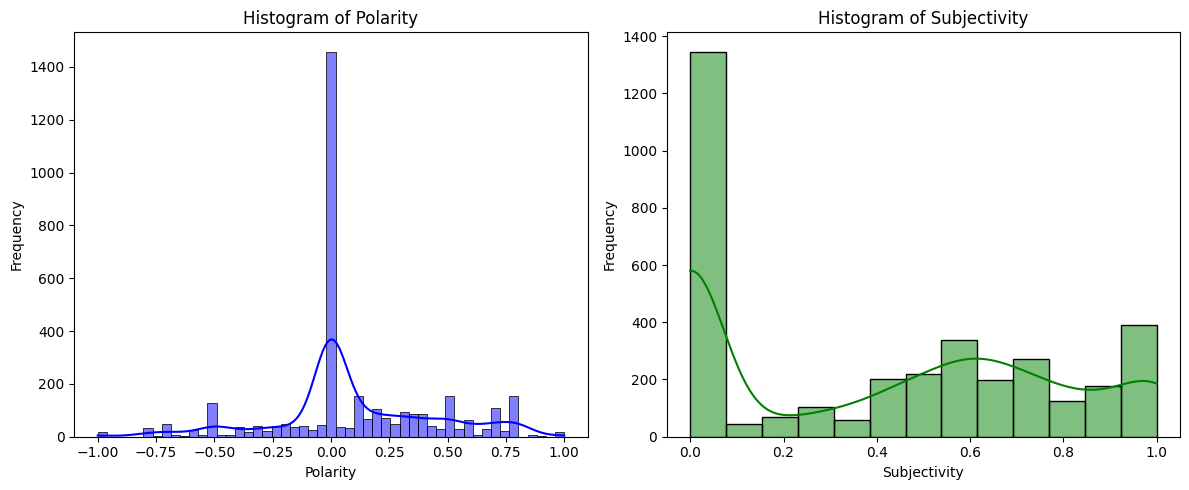

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from collections import Counter

# Assuming 'df' has been loaded and 'cleaned_text' column is prepared as described in previous interactions

# Calculate sentiment polarity and subjectivity using TextBlob
df['polarity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['processed_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Set up the matplotlib figure for histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with two subplots

# Plot histogram of polarity
sns.histplot(df['polarity'], kde=True, ax=axes[0], color='blue')  # Use the first subplot for polarity
axes[0].set_title('Histogram of Polarity')
axes[0].set_xlabel('Polarity')
axes[0].set_ylabel('Frequency')

# Plot histogram of subjectivity
sns.histplot(df['subjectivity'], kde=True, ax=axes[1], color='green')  # Use the second subplot for subjectivity
axes[1].set_title('Histogram of Subjectivity')
axes[1].set_xlabel('Subjectivity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjusts subplots to give some padding between them
plt.show()  # Show the plot

# Word frequency analysis
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


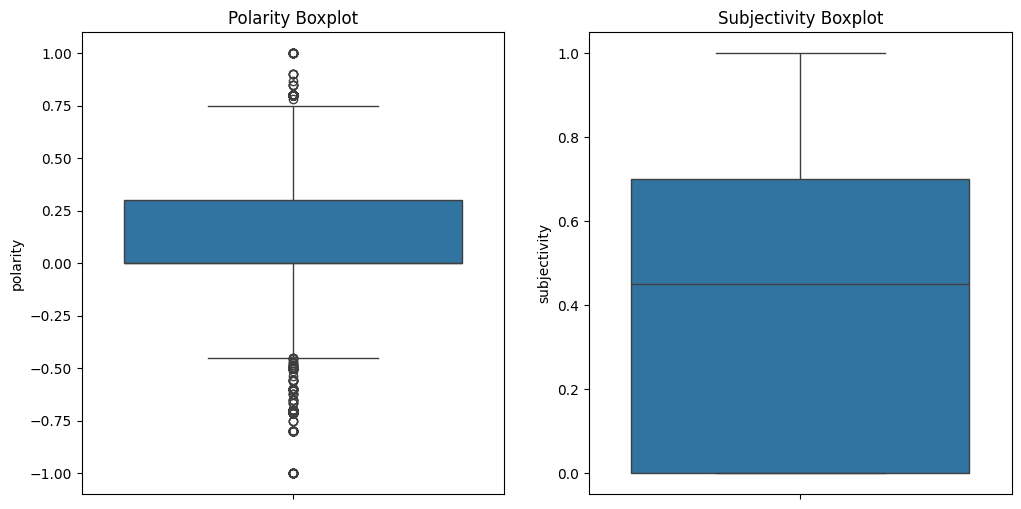

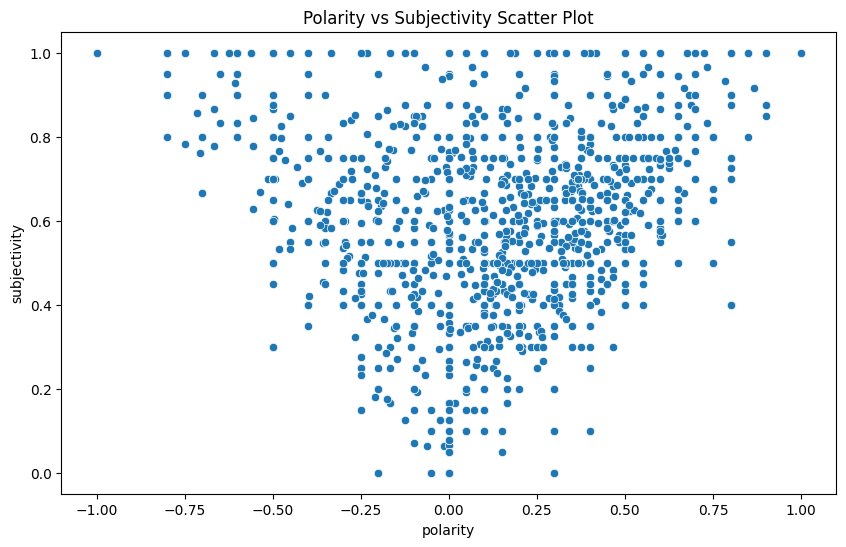

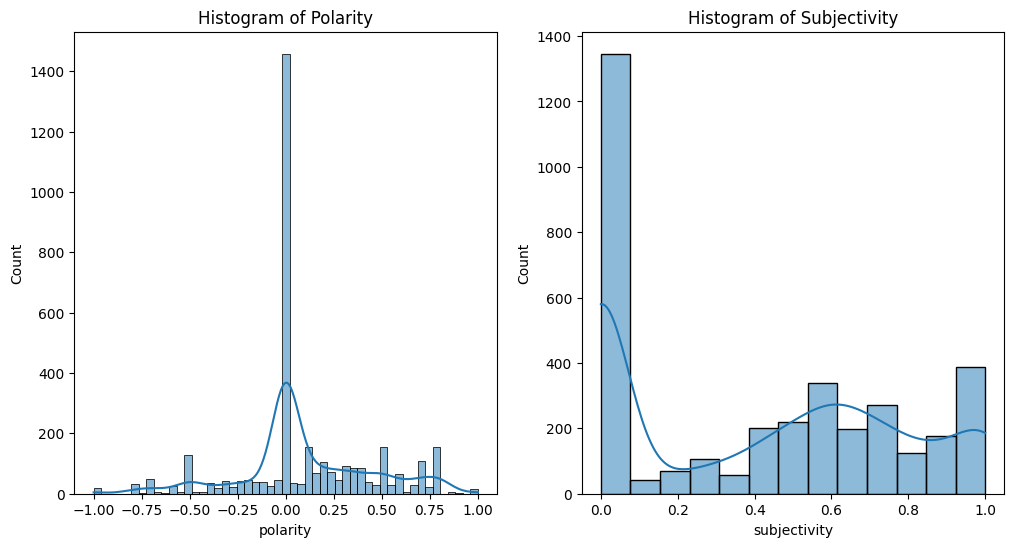

<ipython-input-18-c8d4f1febd59>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_b

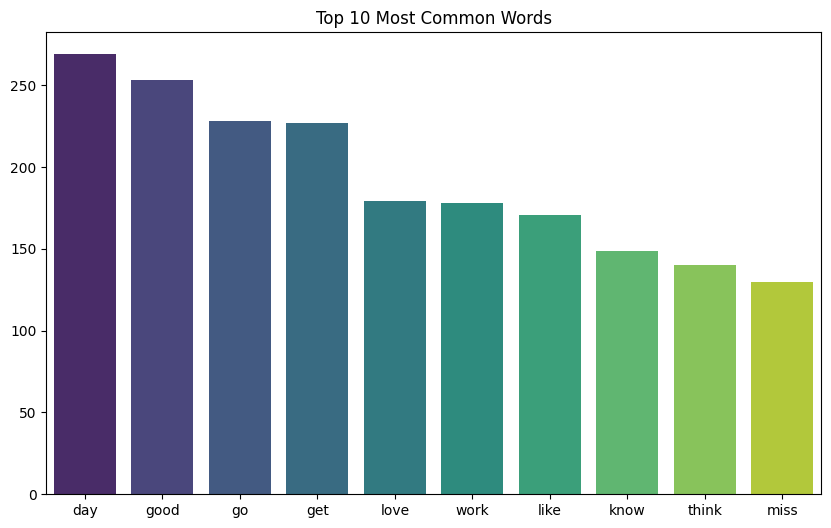

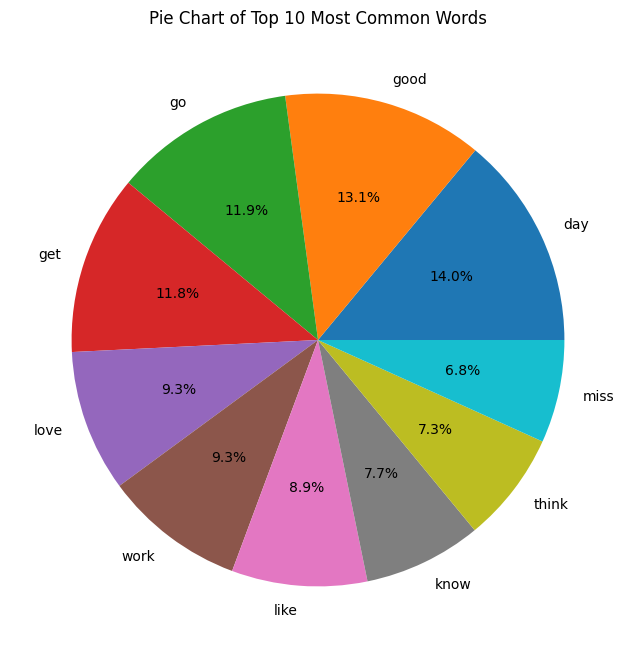

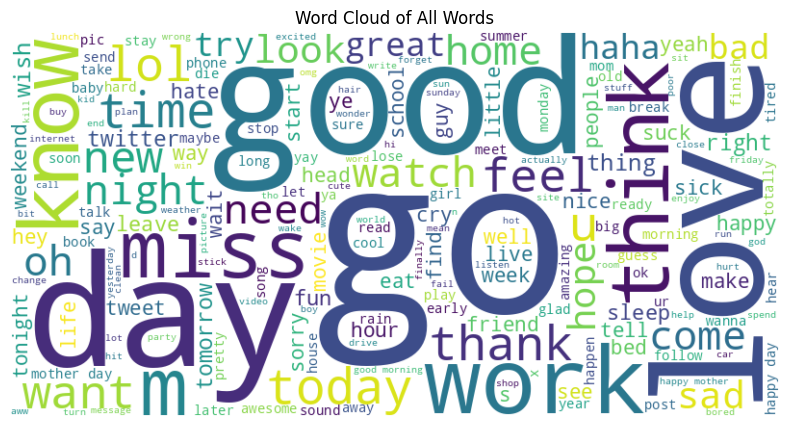

In [ ]:

# Visualizations
## Box plot for polarity and subjectivity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='polarity')
plt.title('Polarity Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='subjectivity')
plt.title('Subjectivity Boxplot')
plt.show()

## Scatter plot for polarity vs subjectivity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='polarity', y='subjectivity', data=df)
plt.title('Polarity vs Subjectivity Scatter Plot')
plt.show()

## Histogram of polarity and subjectivity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['polarity'], kde=True)
plt.title('Histogram of Polarity')
plt.subplot(1, 2, 2)
sns.histplot(df['subjectivity'], kde=True)
plt.title('Histogram of Subjectivity')
plt.show()

## Word frequency analysis
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)

## Bar chart for the 10 most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette='viridis')
plt.title('Top 10 Most Common Words')
plt.show()

## Pie chart for the 10 most common words
plt.figure(figsize=(10, 8))
plt.pie([freq for (word, freq) in most_common_words], labels=[word for (word, freq) in most_common_words], autopct='%1.1f%%')
plt.title('Pie Chart of Top 10 Most Common Words')
plt.show()

#Import the wordcloud module
from wordcloud import WordCloud

## Generate and display a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Words')
plt.show()


In [ ]:
# Covariance and Correlation
print("Covariance:\n", df[['polarity', 'subjectivity']].cov())
print("Correlation:\n", df[['polarity', 'subjectivity']].corr())

Covariance:
               polarity  subjectivity
polarity      0.123682      0.023941
subjectivity  0.023941      0.135608
Correlation:
               polarity  subjectivity
polarity      1.000000      0.184858
subjectivity  0.184858      1.000000


#TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can change max_features to control the number of features

# Fit and transform the cleaned text
X = vectorizer.fit_transform(df['processed_text'])

# Convert the result to a DataFrame to see the term-document matrix
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the vectorized data
tfidf_df.head()


,able,absolutely,ac,acc,access,accord,account,act,actually,ad,...,yep,yes,yesterday,yo,young,youtube,yr,yum,yummy,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Logic of code**
This code is using `TfidfVectorizer` from `scikit-learn` to convert text data into numerical form, which is required for machine learning models.
1. **Importing the TfidfVectorizer**:
   - `TfidfVectorizer` is a tool that converts text into numbers. It calculates something called "TF-IDF" (Term Frequency-Inverse Document Frequency), which gives more importance to rare words and less importance to common words like "the" or "is."

2. **Initializing the Vectorizer**:
   - The `vectorizer = TfidfVectorizer()` line creates an object of the `TfidfVectorizer` class. We can customize it to control how many features (words) to keep, but in this case, it uses the default settings.

3. **Fitting and Transforming the Text**:
   - `X = vectorizer.fit_transform(df['cleaned_text'])` processes the cleaned text from your DataFrame (`df['cleaned_text']`).
   - **Fit**: This step learns the vocabulary from the text, meaning it figures out which words are present.
   - **Transform**: This step converts each piece of text into a list of numbers, where each number represents the importance of a word in that text.

4. **Converting to a DataFrame**:
   - `tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())` converts the result into a DataFrame so you can see it in a table format. Each column represents a word, and each row represents a tweet or a sentence.

5. **Displaying the First Few Rows**:
   - `tfidf_df.head()` displays the first few rows of the matrix, where each row corresponds to a text, and each column corresponds to a word. The values in the table show the importance of each word in that specific piece of text.

### In Simple Terms:
- Turning  cleaned text into numbers that a machine learning model can understand. Each text gets converted into a row of numbers, where the numbers represent how important each word is in that text. This is done using the TF-IDF method, which gives more weight to rare but important words.

In [ ]:
# Check unique values in the 'sentiment' column
print(df['sentiment'].unique())


['neutral' 'positive' 'negative' nan]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Drop rows where sentiment is NaN
df_cleaned = df.dropna(subset=['sentiment'])

# Re-encode the labels after removing NaN values
y_cleaned = label_encoder.fit_transform(df_cleaned['sentiment'])

# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[df_cleaned.index], y_cleaned, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Added max_iter to avoid convergence issues
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


              precision    recall  f1-score   support

    negative       0.73      0.51      0.60       211
     neutral       0.57      0.78      0.66       274
    positive       0.80      0.67      0.73       222

    accuracy                           0.66       707
   macro avg       0.70      0.65      0.66       707
weighted avg       0.69      0.66      0.66       707





#**Output**:
The logistic regression model was evaluated on a test set of 707 samples, distributed across three sentiment classes: **negative**, **neutral**, and **positive**. The overall **accuracy** of the model is 67%, which means that 67% of the predictions were correct. The detailed performance is broken down below:

### Class-Level Performance:

1. **Negative Sentiment**:
   - **Precision (0.74)**: Out of all the tweets predicted as negative, 74% were actually negative. This indicates that the model is fairly precise in identifying negative tweets but still has room for improvement.
   - **Recall (0.55)**: The model correctly identified 55% of all actual negative tweets. This suggests that the model misses almost half of the negative instances, potentially predicting them as neutral or positive.
   - **F1-Score (0.63)**: This metric balances precision and recall, indicating moderate performance for identifying negative tweets.

2. **Neutral Sentiment**:
   - **Precision (0.58)**: Only 58% of the tweets predicted as neutral were truly neutral, indicating lower precision compared to the other classes.
   - **Recall (0.77)**: The model captured 77% of actual neutral tweets, meaning it does well in identifying neutral tweets, but it often predicts neutral for other classes, leading to lower precision.
   - **F1-Score (0.66)**: The balance between precision and recall for neutral sentiment is decent, but improvements in precision would boost this score.

3. **Positive Sentiment**:
   - **Precision (0.79)**: Out of all the tweets predicted as positive, 79% were correctly labeled. This is the highest precision among all classes, showing that the model is good at identifying positive tweets when it predicts them.
   - **Recall (0.66)**: The model correctly identified 66% of all actual positive tweets, suggesting it missed about a third of the positive instances.
   - **F1-Score (0.72)**: The positive class shows strong overall performance, indicating that the model is good at recognizing and classifying positive sentiments.

### Overall Metrics:

- **Accuracy (67%)**: The model correctly predicted the sentiment of 67% of all tweets. This is a moderate level of accuracy, but there is potential for improvement, especially in the "negative" and "neutral" classes.
  
- **Macro Average**:
   - Precision (0.70), Recall (0.66), and F1-Score (0.67): These are the unweighted averages of the performance across all classes. The results suggest balanced performance across all three classes, though "neutral" tends to lower these scores slightly.

- **Weighted Average**:
   - Precision (0.69), Recall (0.67), and F1-Score (0.67): These metrics are weighted by the number of instances in each class. They are similar to the macro average because the class distribution is relatively even, showing overall performance is balanced.

### Key Insights:
- The model performs best at identifying **positive** tweets, with a strong precision (0.79) and decent recall (0.66).
- **Negative** tweets show moderate performance, but the model struggles with recall, identifying only 55% of negative instances.
- **Neutral** tweets have the highest recall (0.77) but lower precision (0.58), suggesting the model often predicts neutral incorrectly for other classes.
  


# **Logic of the code**
1. **Importing Libraries**:
   - `train_test_split`: Splits your dataset into training and testing sets.
   - `LabelEncoder`: Converts categorical labels (like sentiment) into numbers that the model can work with.
   - `LogisticRegression`: The machine learning model used for classification.
   - `classification_report`: A function that gives detailed performance metrics (precision, recall, f1-score).

2. **LabelEncoder**:
   - `label_encoder = LabelEncoder()`: Creates a `LabelEncoder` object to turn sentiment labels (e.g., positive, negative, neutral) into numerical values (e.g., 0, 1, 2).

3. **Data Cleaning**:
   - `df_cleaned = df.dropna(subset=['sentiment'])`: Removes rows where the `sentiment` column has missing values (`NaN`). This ensures that only rows with a valid sentiment label are used.

4. **Label Encoding**:
   - `y_cleaned = label_encoder.fit_transform(df_cleaned['sentiment'])`: Converts the sentiment column into numbers. For example, "positive" might become 0, "neutral" might become 1, etc. The `fit_transform()` function both learns the mapping from text to numbers and applies it.

5. **Splitting the Data**:
   - `X_train, X_test, y_train, y_test = train_test_split(X[df_cleaned.index], y_cleaned, test_size=0.2, random_state=42)`: Splits the cleaned data into training and testing sets.
     - `X_train` and `X_test`: Features (e.g., TF-IDF values from the text) for training and testing.
     - `y_train` and `y_test`: Labels (encoded sentiments) for training and testing.
     - `test_size=0.2`: Reserves 20% of the data for testing, and the remaining 80% is used for training.
     - `random_state=42`: Ensures reproducibility of results by setting a seed for randomness.

6. **Training the Logistic Regression Model**:
   - `model = LogisticRegression(max_iter=1000)`: Creates a logistic regression model and sets `max_iter=1000` to allow enough iterations for the model to converge (finish learning).
   - `model.fit(X_train, y_train)`: Trains the logistic regression model using the training data (`X_train` and `y_train`).

7. **Making Predictions**:
   - `y_pred = model.predict(X_test)`: Uses the trained model to predict the sentiment for the test data (`X_test`). The output (`y_pred`) will be a list of predicted sentiment labels for the test set.

8. **Evaluating the Model**:
   - `print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))`: Prints a detailed evaluation of how well the model performed on the test set.
     - `precision`: The proportion of true positive predictions for each class.
     - `recall`: The proportion of actual positive examples that were correctly predicted.
     - `f1-score`: A combination of precision and recall.
     - `support`: The number of actual occurrences of each class in the test data.

### Summary:
- This code prepares a dataset, encodes the labels, splits the data, trains a logistic regression model on the training data, makes predictions on the test data, and evaluates the model’s performance using precision, recall, and F1-score metrics.



#PREDICTION

In [ ]:
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the English NLP model from spaCy
nlp = spacy.load('en_core_web_lg')

def process_text(text):
    """Preprocess text using spaCy to tokenize, lemmatize, and remove stopwords and non-alphabetic characters."""
    doc = nlp(text.lower())  # Process text and convert to lower case
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]  # Lemmatize and remove stopwords and non-alphabetic characters
    return ' '.join(tokens)

def predict_sentiment(new_text, model, vectorizer, label_encoder):
    """Predict the sentiment of a given text using a trained logistic regression model, a vectorizer, and a label encoder."""
    # Clean and preprocess the input text using the spaCy-based process_text function
    cleaned_text = process_text(new_text)

    # Check if the cleaned text is empty after preprocessing
    if not cleaned_text:  # If cleaned text is empty, provide a default neutral sentiment
        return "Neutral"  # This could be adjusted depending on what default sentiment you prefer

    # Vectorize the cleaned text using the fitted TfidfVectorizer
    vectorized_text = vectorizer.transform([cleaned_text])

    # Predict the sentiment using the trained logistic regression model
    sentiment_encoded = model.predict(vectorized_text)

    # Convert the encoded sentiment back to the original sentiment label
    sentiment_label = label_encoder.inverse_transform(sentiment_encoded)

    return sentiment_label[0]

# Example setup and usage
# Assume 'model', 'vectorizer', and 'label_encoder' are already fitted to your training data
new_text = "I absolutely love this product, it's amazing"
predicted_sentiment = predict_sentiment(new_text, model, vectorizer, label_encoder)
print(f"The predicted sentiment for the text is: {predicted_sentiment}")


The predicted sentiment for the text is: positive


This function encapsulates the entire process of taking raw text input, cleaning it, vectorizing it, and using a trained logistic regression model to predict the sentiment. It provides flexibility by allowing you to input any new text, predict its sentiment, and return the corresponding sentiment label in a user-friendly format